# sklearn.ensemble.HistGradientBoostingRegressor
- Boosting refers to a class of ensemble learning algorithms that add tree models to an ensemble sequentially. Each tree model added to the ensemble attempts to correct the prediction errors made by the tree models already present in the ensemble.

- Gradient boosting is a generalization of boosting algorithms like AdaBoost to a statistical framework that treats the training process as an additive model and allows arbitrary loss functions to be used, greatly improving the capability of the technique. As such, gradient boosting ensembles are the go-to technique for most structured (e.g. tabular data) predictive modeling tasks.

In [2]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [3]:
Data=pd.read_csv('1000_y_data.csv')
features = Data.columns[1:23]
target = Data.columns[23:50]
Chest_deflection = Data.columns[23]
pelvis = Data.columns[24]
Rib6 = Data.columns[31]
col = Data.columns
cv = KFold(n_splits=10)
X = Data[features]
y = Data[Rib6]

# Validation curves

# Learning rate
- float, default=0.1
- The learning rate, also known as shrinkage. This is used as a multiplicative factor for the leaves values. Use 1 for no shrinkage.

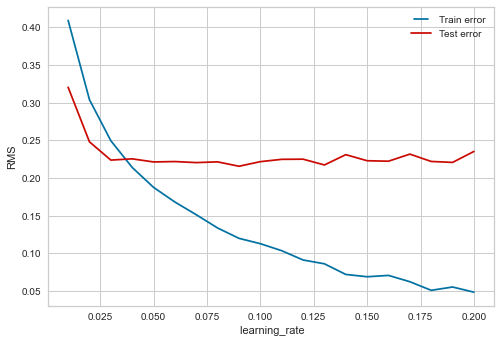

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
learning_rates = np.linspace(0.01,0.2,20)
train_results = []
test_results = []
for eta in learning_rates:
    model = HistGradientBoostingRegressor(learning_rate=eta)
    wrapped_model = TransformedTargetRegressor(regressor=model,func=np.log,inverse_func=np.exp)
    mod=wrapped_model.fit(x_train, y_train)
    train_pred = mod.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = mod.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' learning_rate')
plt.show()

# max_iter
- int, default=100
- The maximum number of iterations of the boosting process, i.e. the maximum number of trees.

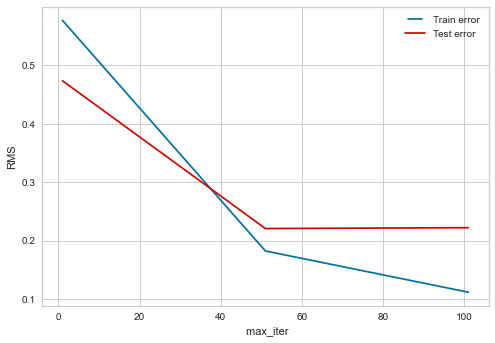

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
learning_rates = np.arange(1, 150, 50)
train_results = []
test_results = []
for eta in learning_rates:
    model = HistGradientBoostingRegressor(max_iter=eta)
    wrapped_model = TransformedTargetRegressor(regressor=model,func=np.log,inverse_func=np.exp)
    mod=wrapped_model.fit(x_train, y_train)
    train_pred = mod.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = mod.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' max_iter')
plt.show()

# max_leaf_nodes
- int or None, default=31
- The maximum number of leaves for each tree. Must be strictly greater than 1. If None, there is no maximum limit.

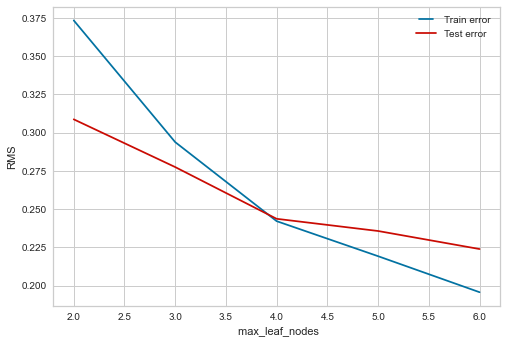

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
learning_rates = np.arange(2, 7, 1)
train_results = []
test_results = []
for eta in learning_rates:
    model = HistGradientBoostingRegressor(max_leaf_nodes=eta)
    wrapped_model = TransformedTargetRegressor(regressor=model,func=np.log,inverse_func=np.exp)
    mod=wrapped_model.fit(x_train, y_train)
    train_pred = mod.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = mod.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' max_leaf_nodes')
plt.show()

# Max_depth
- int or None, default=None
- The maximum depth of each tree. The depth of a tree is the number of edges to go from the root to the deepest leaf. Depth isn’t constrained by default.

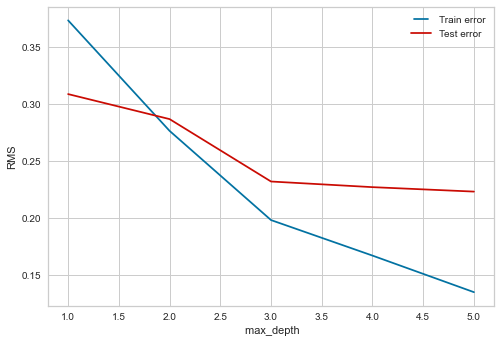

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
learning_rates = np.linspace(1, 5, 5, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = HistGradientBoostingRegressor(max_depth=eta)
    wrapped_model = TransformedTargetRegressor(regressor=model,func=np.log,inverse_func=np.exp)
    mod=wrapped_model.fit(x_train, y_train)
    train_pred = mod.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = mod.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' max_depth')
plt.show()

# min_samples_leaf
- int, default=20
- The minimum number of samples per leaf. For small datasets with less than a few hundred samples, it is recommended to lower this value since only very shallow trees would be built.

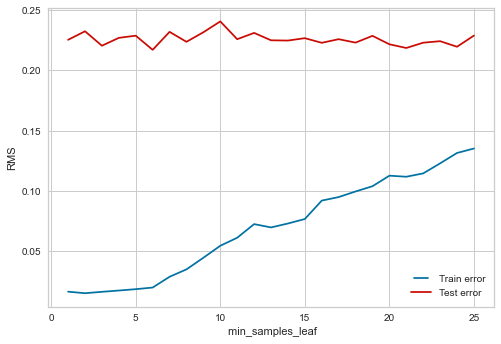

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
learning_rates = np.linspace(1, 25, 25, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = HistGradientBoostingRegressor(min_samples_leaf=eta)
    wrapped_model = TransformedTargetRegressor(regressor=model,func=np.log,inverse_func=np.exp)
    mod=wrapped_model.fit(x_train, y_train)
    train_pred = mod.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = mod.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' min_samples_leaf')
plt.show()

# l2_regularization
- float, default=0
- The L2 regularization parameter. Use 0 for no regularization (default).

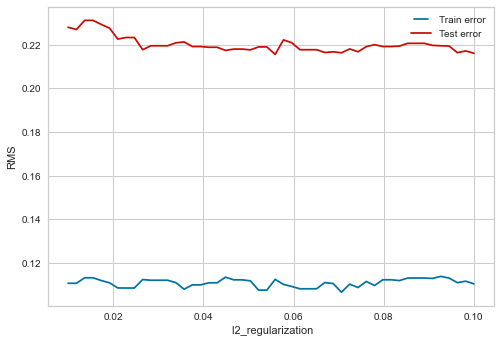

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
learning_rates =  np.linspace(0.01,0.1, 50, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = HistGradientBoostingRegressor(l2_regularization=eta)
    wrapped_model = TransformedTargetRegressor(regressor=model,func=np.log,inverse_func=np.exp)
    mod=wrapped_model.fit(x_train, y_train)
    train_pred = mod.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = mod.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' l2_regularization')
plt.show()

---
---

# Random Hyperparameter Grid

In [15]:
X = Data[features]
y = Data[Rib4]

In [4]:
#Rib4
hist_grid = {"learning_rate"   : np.linspace(1e-08,0.1,100,endpoint=True),
             "max_iter":[10,15,20,25,30,35],
             "max_leaf_nodes":[3,4,5,6,7,8,10,12,15],
             "l2_regularization":np.linspace(1e-04,0.5,100,endpoint=True),
             'max_depth'        : [1,2,3,4,5,6,7,8,9,10],
             "min_samples_leaf" :[2,4,6,8,10,12,14,15,16]
             }
## Neck
# hist_grid = {"learning_rate"   : [0.2,0.25,0.3],
#              "max_iter":[52,55,58],
#              "max_leaf_nodes":[4,5,6],
#              "l2_regularization":[0.40,0.41,0.42],
#              "scoring":['neg_root_mean_squared_error'],
#              'max_depth'        : [1,2],
#              "min_samples_leaf" :[7,8,9]
#              }
## Head acc
# hist_grid = {"learning_rate"   : [0.2,0.25,0.3],
#              "max_iter":[50,52,55],
#              "max_leaf_nodes":[4,5,6],
#              "l2_regularization":[0.40,0.41,0.42],
#              "scoring":['neg_root_mean_squared_error'],
#              'max_depth'        : [1,2],
#              "min_samples_leaf" :[3,4,5]
#              }
# #HIC
# hist_grid = {"learning_rate"   : [0.19,0.2,0.21],
#              "max_iter":[50,53,55],
#              "max_leaf_nodes":[3,4,5],
#              "l2_regularization":[0.58],
#              "scoring":['neg_root_mean_squared_error'],
#              'max_depth'        : [3,4],
#              "min_samples_leaf" :[5,6,7]
#              }

In [5]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
y_t=np.log(y)
rf = HistGradientBoostingRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = hist_grid, n_iter = 200, cv = 10, verbose=2, random_state=12, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y_t)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 832 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 1562 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   53.8s finished


RandomizedSearchCV(cv=10, estimator=HistGradientBoostingRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'l2_regularization': array([1.00000000e-04, 5.14949495e-03, 1.01989899e-02, 1.52484848e-02,
       2.02979798e-02, 2.53474747e-02, 3.03969697e-02, 3.54464646e-02,
       4.04959596e-02, 4.55454545e-02, 5.05949495e-02, 5.56444444e-02,
       6.06939394e-02, 6.57434343e-02, 7.07...
       8.88888900e-02, 8.98989909e-02, 9.09090918e-02, 9.19191927e-02,
       9.29292936e-02, 9.39393945e-02, 9.49494955e-02, 9.59595964e-02,
       9.69696973e-02, 9.79797982e-02, 9.89898991e-02, 1.00000000e-01]),
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_iter': [10, 15, 20, 25, 30, 35],
                                        'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 10,
                                                      

In [6]:
rf_random.best_params_

{'min_samples_leaf': 10,
 'max_leaf_nodes': 12,
 'max_iter': 35,
 'max_depth': 6,
 'learning_rate': 0.1,
 'l2_regularization': 0.4192080808080808}

In [8]:
rf_random.best_estimator_

HistGradientBoostingRegressor(l2_regularization=0.4192080808080808, max_depth=6,
                              max_iter=35, max_leaf_nodes=12,
                              min_samples_leaf=10)

In [9]:
X = Data[features]
y = Data[Rib6]
mode=HistGradientBoostingRegressor(l2_regularization=0.4192080808080808,
                             max_depth=6,
                              max_iter=35, max_leaf_nodes=12,
                              min_samples_leaf=10)
mod = TransformedTargetRegressor(regressor=mode, func=np.log,inverse_func=np.exp)


C:\Users\Akhil Srinivas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


<Figure size 576x396 with 0 Axes>

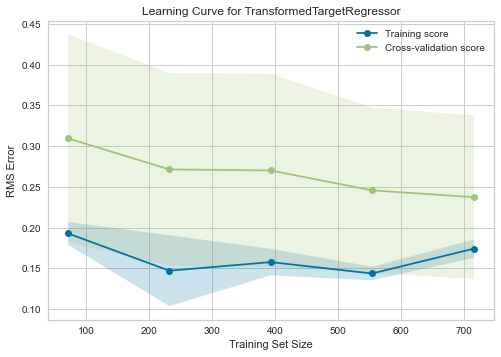

In [10]:
cv = KFold(n_splits=10, random_state=1)
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=12)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [11]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 0.279559

Root Mean squared error: 0.148529

Root Mean squared error: 0.120513

Root Mean squared error: 0.341505

Root Mean squared error: 0.181490

Root Mean squared error: 0.164685

Root Mean squared error: 0.191987

Root Mean squared error: 0.240234

Root Mean squared error: 0.213925

Root Mean squared error: 0.486023

error COV--->0    1.653434
dtype: float64  error mean --->0    0.074617
Name: mean, dtype: float64  error std --->0    0.123374
Name: std, dtype: float64


In [12]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    3.068725
dtype: float64  error mean --->0    0.063664
Name: mean, dtype: float64  error std --->0    0.195368
Name: std, dtype: float64


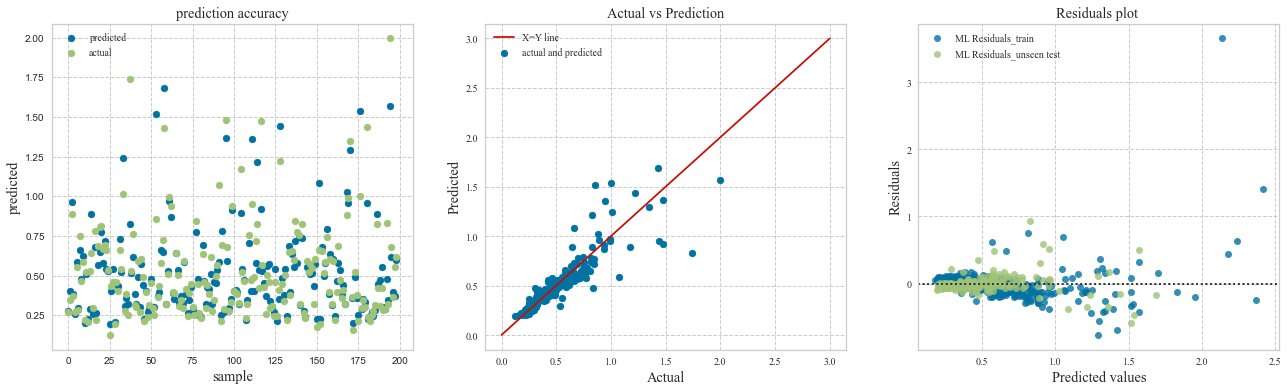

In [13]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([0,3],[0,3],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()

---
---

# Grid search

In [332]:
Data=pd.read_csv('140_crash.csv')
Data=Data[0:130]

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[Head]

In [333]:
#Chest
# hist_grid = {"learning_rate"   : [0.2,0.3,0.4],
#              "max_iter":[50,60,70],
#              "max_leaf_nodes":[4,5,6],
#              "l2_regularization":[0.40,0.41,0.42],
#              "scoring":['neg_root_mean_squared_error'],
#              'max_depth'        : [1,2,3],
#              "min_samples_leaf" :[14,15,16]
#              }
## Neck
# hist_grid = {"learning_rate"   : [0.2,0.25,0.3],
#              "max_iter":[52,55,58],
#              "max_leaf_nodes":[4,5,6],
#              "l2_regularization":[0.40,0.41,0.42],
#              "scoring":['neg_root_mean_squared_error'],
#              'max_depth'        : [1,2],
#              "min_samples_leaf" :[7,8,9]
#              }
## Head acc
# hist_grid = {"learning_rate"   : [0.2,0.25,0.3],
#              "max_iter":[50,52,55],
#              "max_leaf_nodes":[4,5,6],
#              "l2_regularization":[0.40,0.41,0.42],
#              "scoring":['neg_root_mean_squared_error'],
#              'max_depth'        : [1,2],
#              "min_samples_leaf" :[3,4,5]
#              }
#HIC
hist_grid = {"learning_rate"   : [0.19,0.2,0.21],
             "max_iter":[50,53,55],
             "max_leaf_nodes":[3,4,5],
             "l2_regularization":[0.58],
             "scoring":['neg_root_mean_squared_error'],
             'max_depth'        : [3,4],
             "min_samples_leaf" :[5,6,7]
             }

In [334]:
rf = HistGradientBoostingRegressor()
reg = GridSearchCV(rf,param_grid = hist_grid ,cv = cv, return_train_score=True,scoring="neg_root_mean_squared_error", verbose=2, n_jobs = -1)
reg.fit(X,y)
    

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 1244 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 1597 out of 1620 | elapsed:   13.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:   13.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             estimator=HistGradientBoostingRegressor(), n_jobs=-1,
             param_grid={'l2_regularization': [0.58],
                         'learning_rate': [0.19, 0.2, 0.21],
                         'max_depth': [3, 4], 'max_iter': [50, 53, 55],
                         'max_leaf_nodes': [3, 4, 5],
                         'min_samples_leaf': [5, 6, 7],
                         'scoring': ['neg_root_mean_squared_error']},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [335]:
reg.best_estimator_

HistGradientBoostingRegressor(l2_regularization=0.58, learning_rate=0.21,
                              max_depth=3, max_iter=50, max_leaf_nodes=3,
                              min_samples_leaf=7,
                              scoring='neg_root_mean_squared_error')

In [251]:
# #chest
# mod=HistGradientBoostingRegressor(l2_regularization=0.2, learning_rate=0.095,
#                               max_depth=7, max_iter=150, max_leaf_nodes=16,
#                               min_samples_leaf=1,
#                               scoring='neg_root_mean_squared_error')
#***
# mod=HistGradientBoostingRegressor(l2_regularization=0.41, learning_rate=0.3,
#                               max_depth=2, max_iter=60, max_leaf_nodes=4,
#                               min_samples_leaf=15,
#                               scoring='neg_root_mean_squared_error')
## Neck***
# mod=HistGradientBoostingRegressor(l2_regularization=0.41, learning_rate=0.25,
#                               max_depth=2, max_iter=55, max_leaf_nodes=4,
#                               min_samples_leaf=9,
#                               scoring='neg_root_mean_squared_error')
#Head acc
mod=HistGradientBoostingRegressor(l2_regularization=0.4, learning_rate=0.3,
                              max_depth=1, max_iter=50, max_leaf_nodes=4,
                              min_samples_leaf=5,
                              scoring='neg_root_mean_squared_error')

In [252]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [253]:
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')
kf=cv

## Learning Curve

<Figure size 576x396 with 0 Axes>

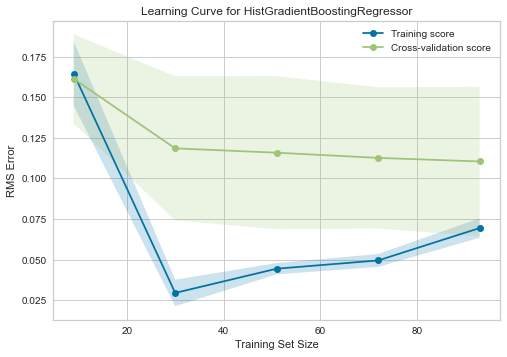

In [254]:
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

## Unknown data test

In [255]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 0.093006

Root Mean squared error: 0.072225

Root Mean squared error: 0.060374

Root Mean squared error: 0.163680

Root Mean squared error: 0.130274

Root Mean squared error: 0.081939

Root Mean squared error: 0.076866

Root Mean squared error: 0.095715

Root Mean squared error: 0.219991

Root Mean squared error: 0.093431

error COV--->0    0.930491
dtype: float64  error mean --->0    0.066649
Name: mean, dtype: float64  error std --->0    0.062017
Name: std, dtype: float64


# train score

In [256]:
ytestunk=HBM_Train.predict(X)
err=np.zeros(len(ytestunk))

for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    0.969115
dtype: float64  error mean --->0    0.053911
Name: mean, dtype: float64  error std --->0    0.052246
Name: std, dtype: float64
